# Ultimate Technologies Takehome Challenge

**Import Libraries**

In [1]:
# Data Procesing Libraries

import pandas as pd
import json
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Exploratory Analysis 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Modeling Libraries

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, KFold
from sklearn.metrics import roc_curve, roc_auc_score

### Part 1 ‑ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

**Load logins.json as a dataframe**

In [2]:
logins_data = pd.read_json('logins.json')

#Set login_time as index
logins_data.set_index('login_time', inplace=True)

logins_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Empty DataFrame

In [3]:
#Resample into different time intervals

logins_data['logins'] = 0
logins_15min = logins_data.resample('15Min').count() #Every 15min
logins_hourly = logins_data.resample('60Min').count() #Every 1hr, date-hour
logins_daily = logins_data.resample('D').count() #Daily
logins_weekly = logins_data.resample('W').count() #Weekly
logins_monthly = logins_data.resample('M').count() #Monthly

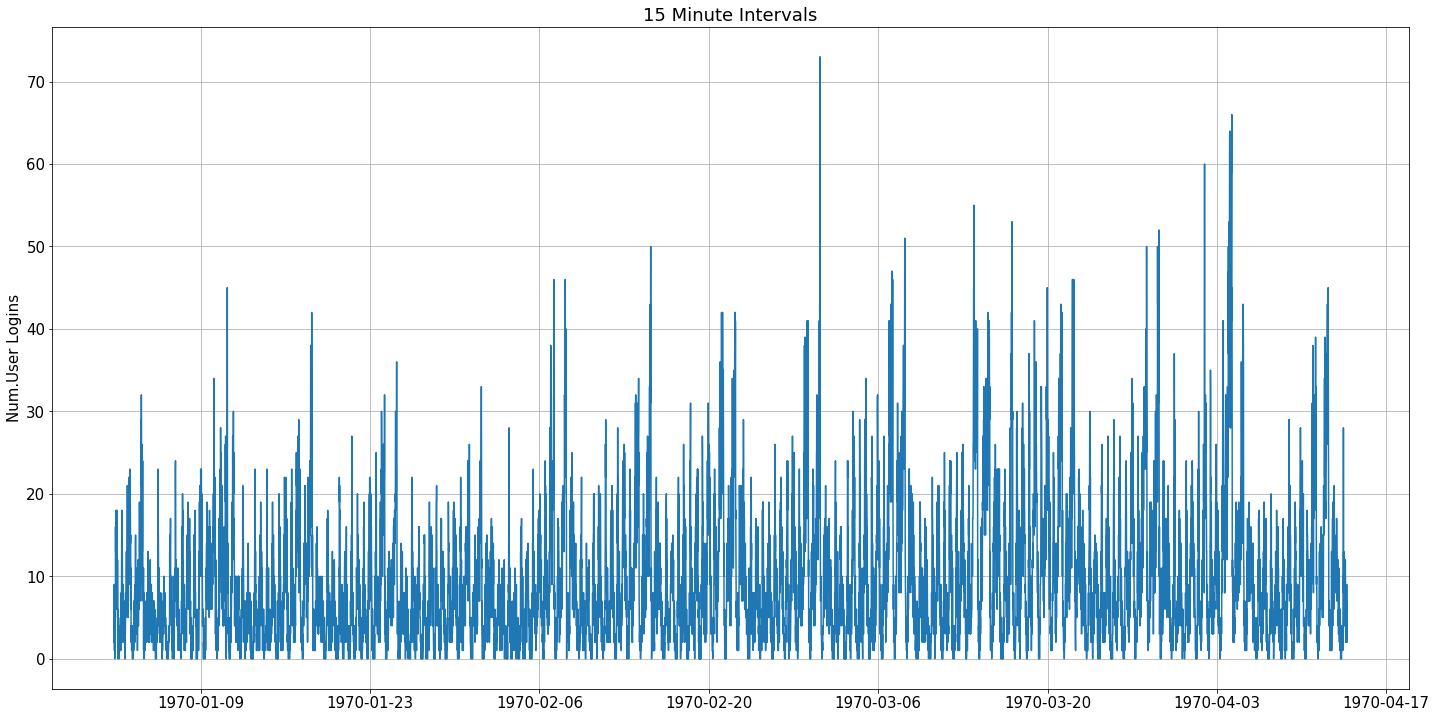

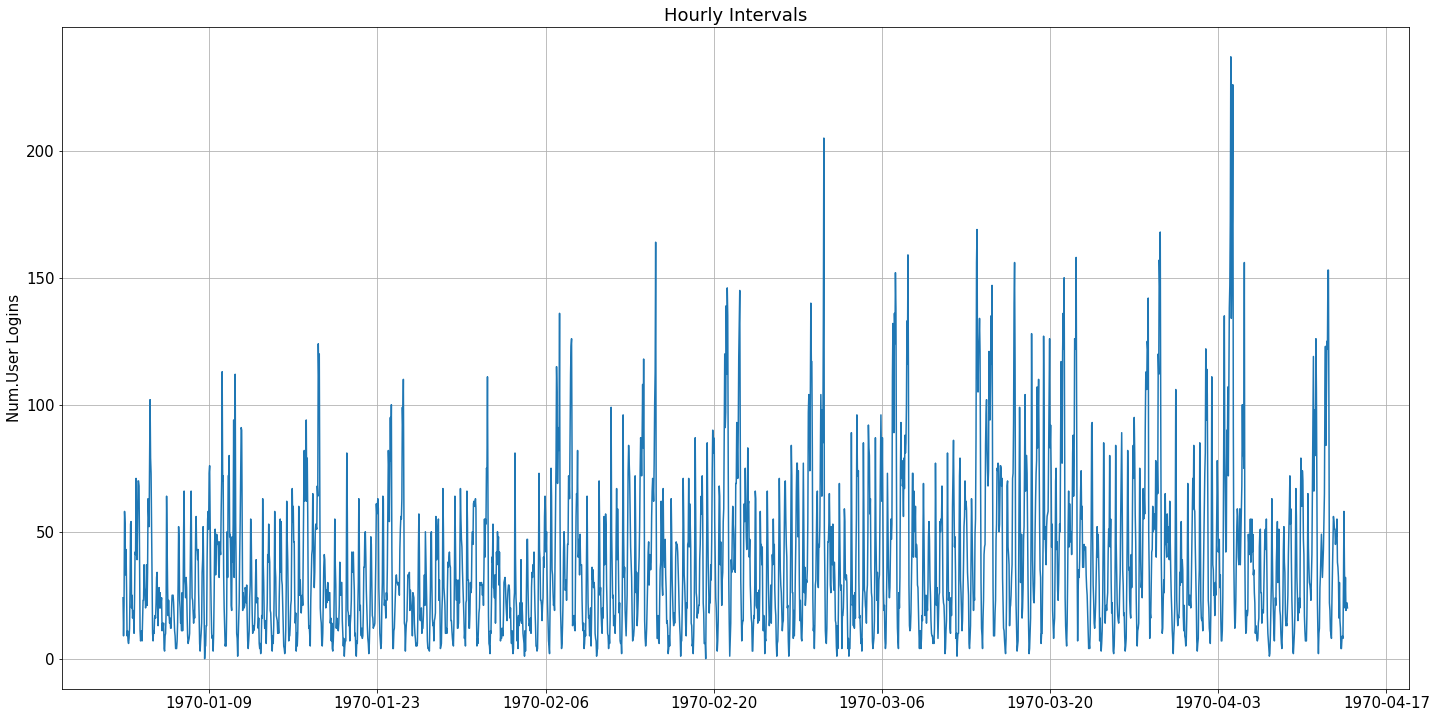

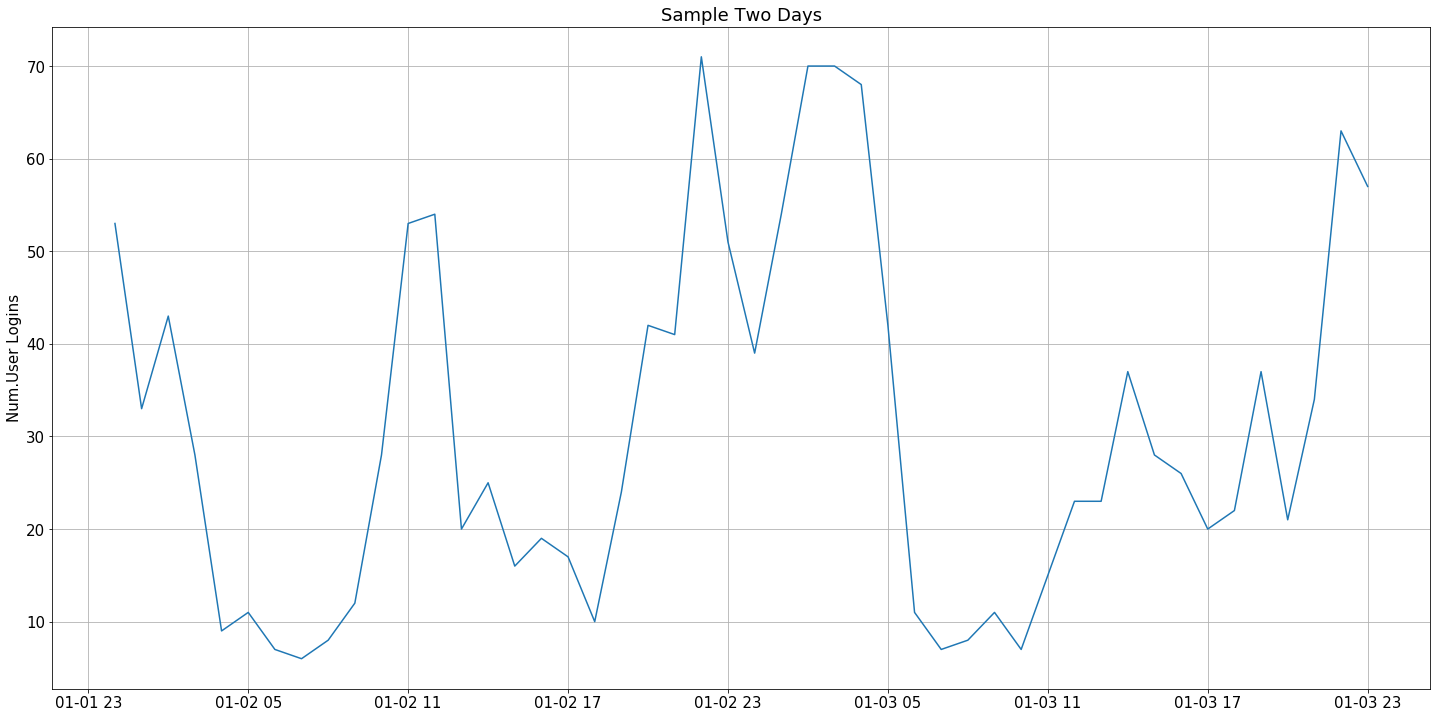

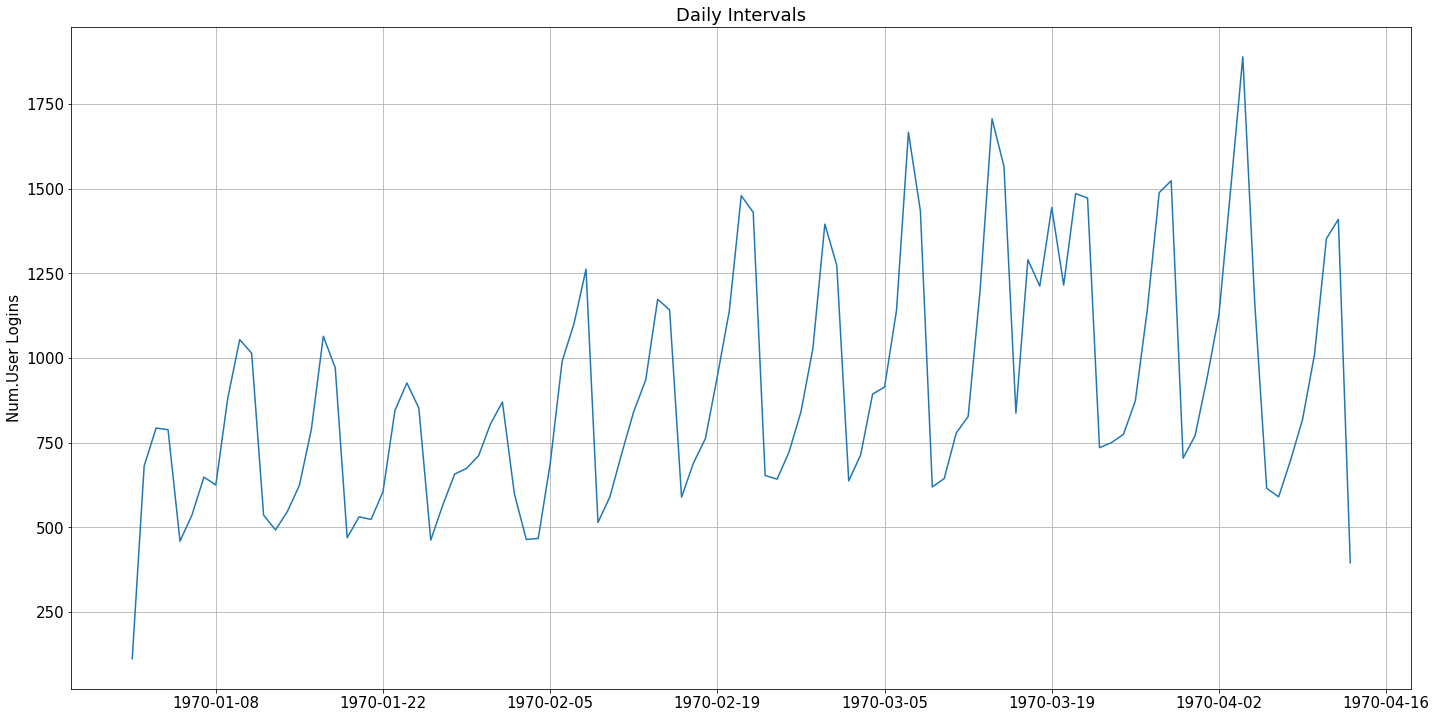

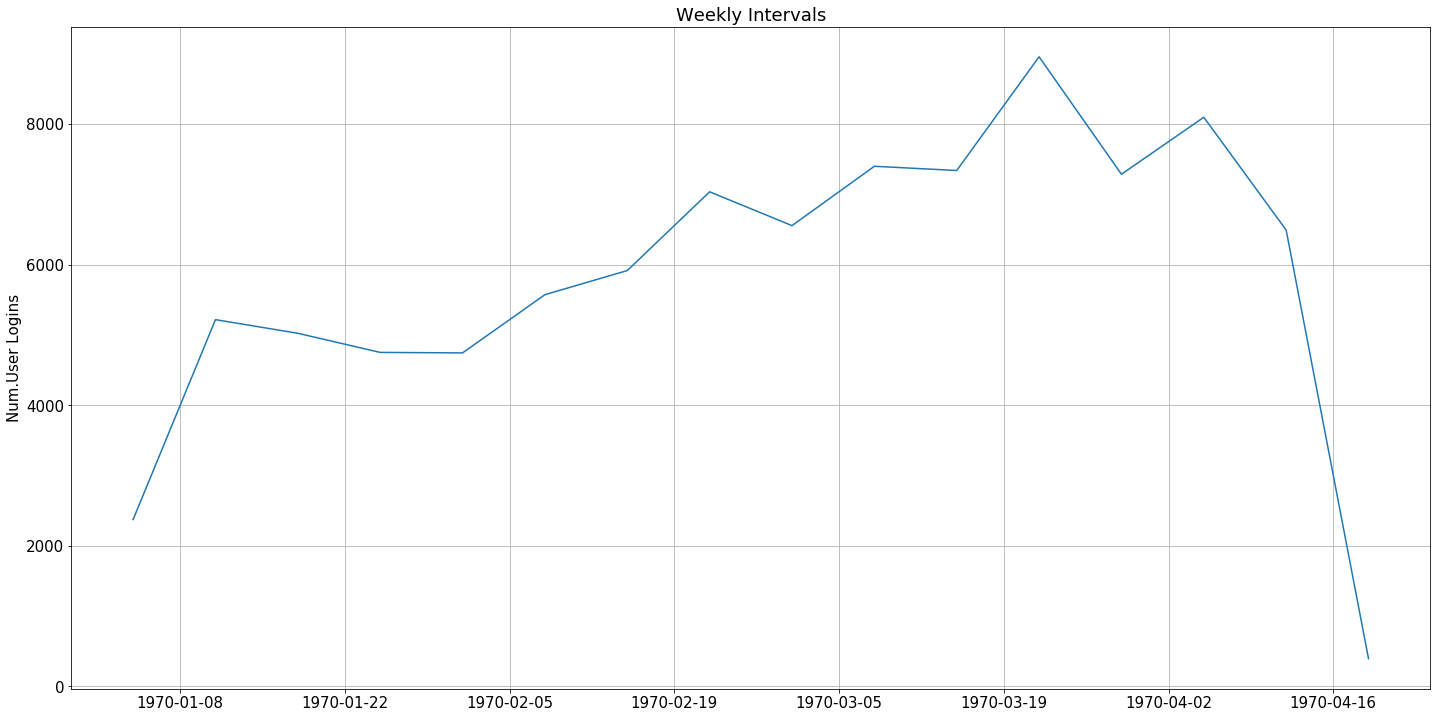

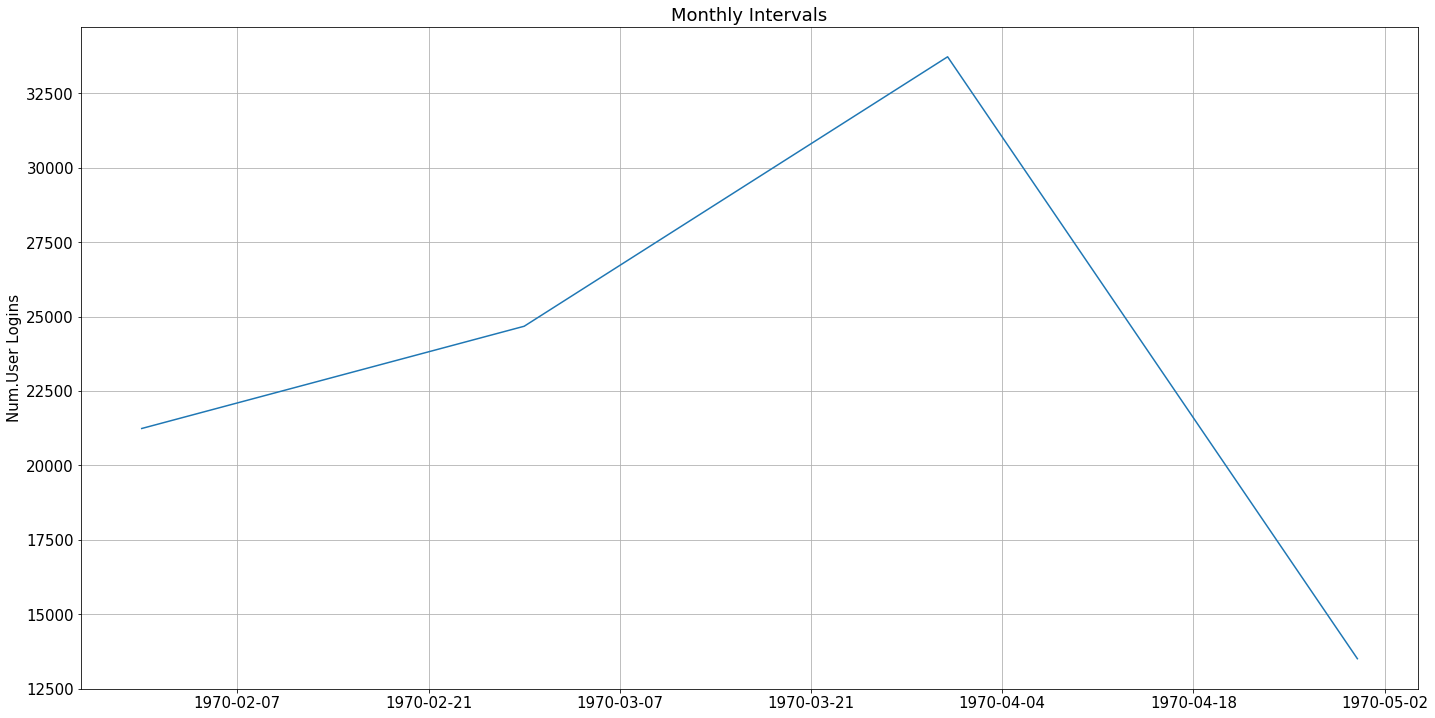

In [4]:
# set figure size
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams.update({'font.size': 15})

# Plot login data in all time intervals
plt.plot(logins_15min['logins'])
plt.tight_layout()
plt.title('15 Minute Intervals')
plt.ylabel('Num.User Logins')
plt.grid()
plt.show()

plt.plot(logins_hourly['logins'])
plt.tight_layout()
plt.title('Hourly Intervals')
plt.ylabel('Num.User Logins')
plt.grid()
plt.show()

sample_day = logins_hourly.loc['1970-01-02':'1970-01-03']

plt.plot(sample_day['logins'])
plt.tight_layout()
plt.title('Sample Two Days')
plt.ylabel('Num.User Logins')
plt.grid()
plt.show()

plt.plot(logins_daily['logins'])
plt.tight_layout()
plt.title('Daily Intervals')
plt.ylabel('Num.User Logins')
plt.grid()
plt.show()

plt.plot(logins_weekly['logins'])
plt.tight_layout()
plt.title('Weekly Intervals')
plt.ylabel('Num.User Logins')
plt.grid()
plt.show()

plt.plot(logins_monthly['logins'])
plt.tight_layout()
plt.title('Monthly Intervals')
plt.ylabel('Num.User Logins')
plt.grid()
plt.show()

In [5]:
sample_day

,logins
login_time,
1970-01-02 00:00:00,53
1970-01-02 01:00:00,33
1970-01-02 02:00:00,43
1970-01-02 03:00:00,28
1970-01-02 04:00:00,9
1970-01-02 05:00:00,11
1970-01-02 06:00:00,7
1970-01-02 07:00:00,6
1970-01-02 08:00:00,8


**Findings:**
    
1. There is a general upward trend from January to mid-April and then it decreases. 
2. Generally, the biggest peak is around late night/early morning (10pm - 5:00am)
3. Mornings tend to be slower and afternoon/early nights steadily increasing to the peak.

### Part 2 ‑ Experiment and metrics design

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

**The metric of sucess will be rate at which drivers serve customers of the another city.**

2.Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    
    A. how you will implement the experiment
    B. What statistical test(s) you will conduct to verify the significance of the observation
    C. How you would interpret the results and provide recommendations to the city
    operations team along with any caveats.

A1. **Hypothesis:** The null hypothesis is that the bridge toll reimbursement has no statistically significant (at alpha = 0.05) impact on driver activity in both cities.

A2: **Methodology:** A representative sample of drivers will be drawn from the population. Then the driver sample would be divided into two groups: a group that receives treatment(i.e gets to be reimbursed for the tolls) and a control group (i.e. drivers who do not receive reimbursement for bridge tolls). Split will be 50%-50% and the splitting woukld be done at random. 

A3. **Procedure:** Have the drivers perform their normal driving activities for 2 weeks to 1 month. Track the sample drivers who crossed the bridge (alternatevely drivers who recieved reimbursement) and their timestamp during the experiment. Sum the number of times the cars crossed the bridge in their respective groups.

B1. **Statistical Tests:** I would use a difference of means between the two groups to find out whether there is an statistically significant difference in the number of bridge crossings between the two groups. The p-value would be calculated either a t-test or permutation resampling.

C1.If we get a p-value that is greater than 0.05, we would fail to reject the null hypothesis that the reimbursement of bridge tolls has NO statistically significant impact on driver activity in both cities. Conversely, if p is less than 0.05, then we would reject the null hypothesis, which would therefore allude to the alternative hypothesis that there is a significant impact on driver activity in both cities with a bridge toll reimbursement for drivers. 

C2. If the toll reimbursement has no statistical significant impact on the number of crossings I would recommend discontinuing the program/pilot. 

C3. If the toll reimbursement has an statistical significant impact, I would suggest continuding the toll reimbursement. Reimbursing tolls for all drivers may get expensive, as such they may want to consider providing reimbursement during peak hours or figuring which level of discount would make drivers cross the bridge.

### Part 3 ‑ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

> ###  3.1 Data Cleaning & Exploratory Analysis

**Load Rider Data**

In [6]:
riders = json.load(open('ultimate_data_challenge.json'))

rider_data = pd.DataFrame(riders)

rider_data['signup_date'] = rider_data['signup_date'].astype('datetime64[ns]')

rider_data['last_trip_date'] = rider_data['last_trip_date'].astype('datetime64[ns]')

rider_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


*Convert to Dates to Datetime objects*

In [7]:
rider_data['signup_date'] = rider_data['signup_date'].astype('datetime64[ns]')

rider_data['last_trip_date'] = rider_data['last_trip_date'].astype('datetime64[ns]')

*Create Retained, Ride first 30 days and Log of trips taken first 30 days | Convert text variables to numbers*

In [8]:
print('Signup Range :', min(rider_data.last_trip_date), '-', max(rider_data.last_trip_date))

print('Last Trip Data in the Dataset:', max(rider_data.last_trip_date))

Signup Range : 2014-01-01 00:00:00 - 2014-07-01 00:00:00
Last Trip Data in the Dataset: 2014-07-01 00:00:00


In [9]:
#Create retained rider indicator colum. This colum indicates wether user rode in the last 30 days.

rider_data['retained_rider'] = np.where(rider_data['last_trip_date'] > '2014-5-31', 1, 0) 

#Create indicator to indicate user took a trip in the first 30 days

rider_data['ride_first_30'] = np.where(rider_data['trips_in_first_30_days'] > 0, 1, 0) 

#Scale number of trips first 30 days and average distance

scaler = MinMaxScaler()

rider_data['ride_first_30_scaled'] = scaler.fit_transform(rider_data[['trips_in_first_30_days']])


rider_data['avg_dist_scaled'] = scaler.fit_transform(rider_data[['avg_dist']])

# Convert boolean to int type

rider_data['ultimate_black_user'] = rider_data['ultimate_black_user'].astype('int')

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [10]:
rider_data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained_rider,ride_first_30,ride_first_30_scaled,avg_dist_scaled
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,1,46.2,1,1,0.032,0.022801
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,0,50.0,0,0,0.000,0.051317
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,0,100.0,0,1,0.024,0.004784
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,1,80.0,1,1,0.072,0.014662
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,0,82.4,0,1,0.112,0.019446


In [11]:
rider_data.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained_rider,ride_first_30,ride_first_30_scaled,avg_dist_scaled
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,0.37708,60.926084,0.376080,0.692200,0.018226,0.036014
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,0.48466,37.081503,0.484405,0.461588,0.030341,0.035458
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,0.00000,33.300000,0.000000,0.000000,0.000000,0.015035
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,0.00000,66.700000,0.000000,1.000000,0.008000,0.024105
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,1.00000,100.000000,1.000000,1.000000,0.024000,0.043116
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,1.00000,100.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
rider_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null int64
weekday_pct               50000 non-null float64
retained_rider            50000 non-null int64
ride_first_30             50000 non-null int64
ride_first_30_scaled      50000 non-null float64
avg_dist_scaled           50000 non-null float64
dtypes: datetime64[ns](2), float64(8), int64(4), object(2)
memory usage: 6.1+ MB


**Exploratory Analysis - NUMERICAL FEATURES**

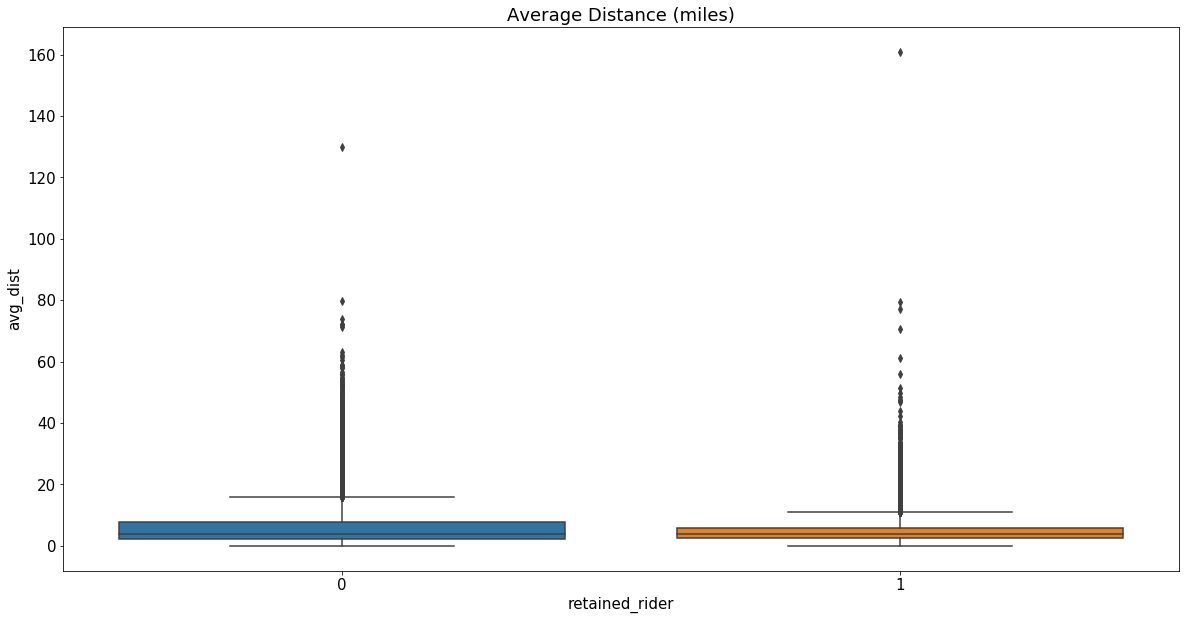

In [13]:
sns.boxplot(x = 'retained_rider', y ='avg_dist', data=rider_data)
plt.title('Average Distance (miles)')
plt.show()

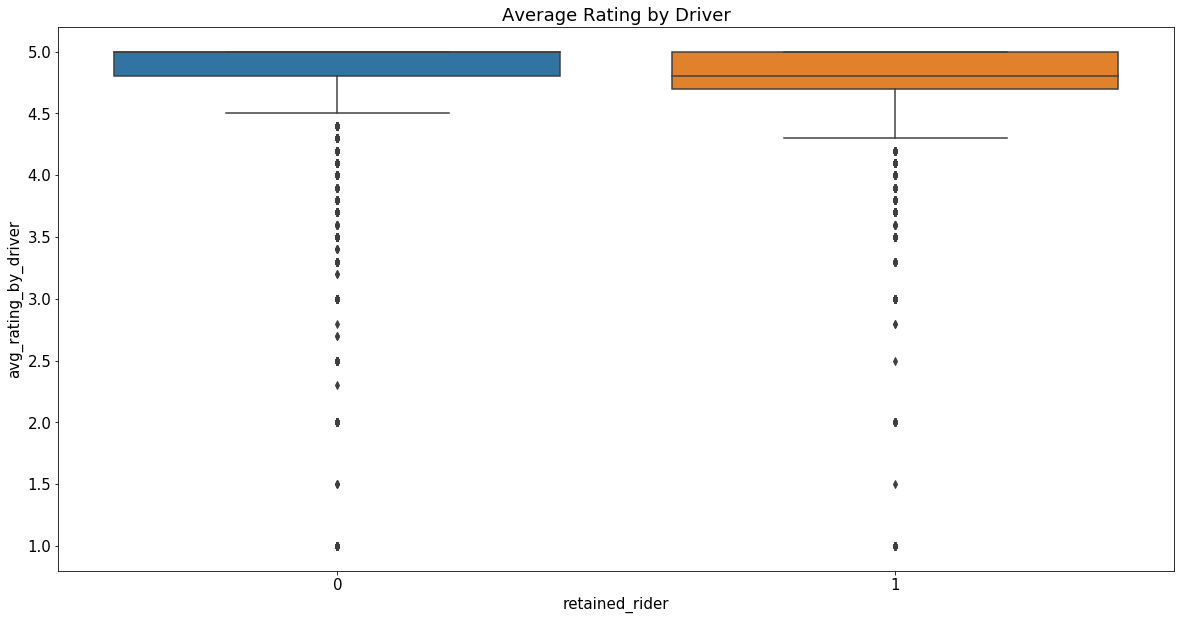

In [14]:
sns.boxplot(x = 'retained_rider', y ='avg_rating_by_driver', data=rider_data)
plt.title('Average Rating by Driver')
plt.show()

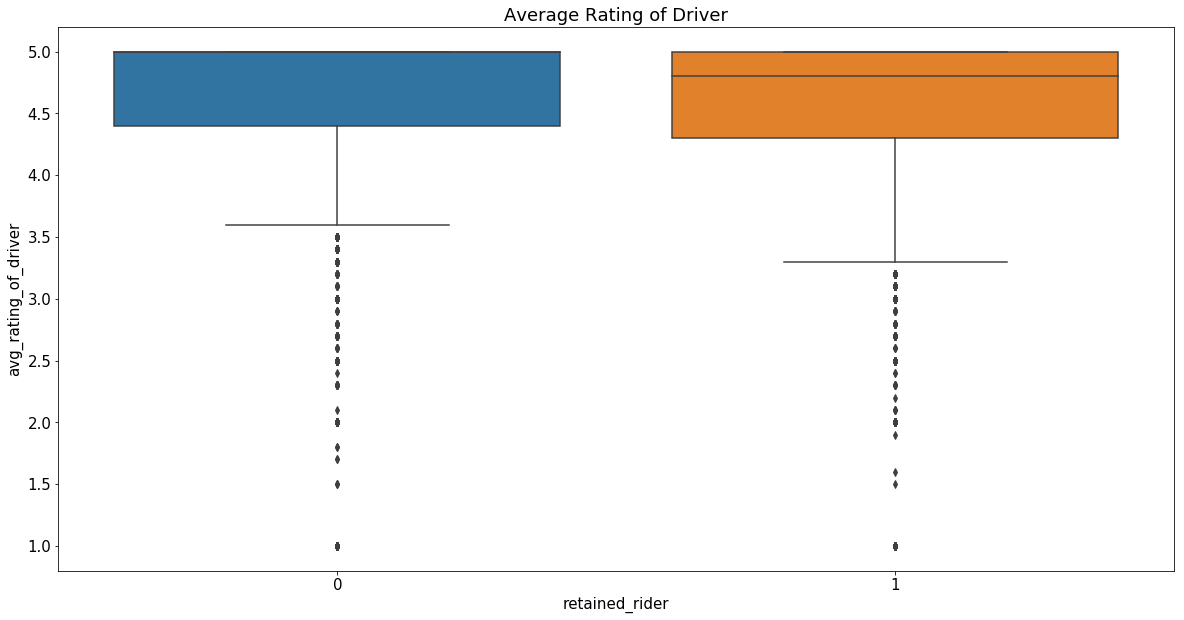

In [15]:
sns.boxplot(x = 'retained_rider', y ='avg_rating_of_driver', data=rider_data)
plt.title('Average Rating of Driver')
plt.show()

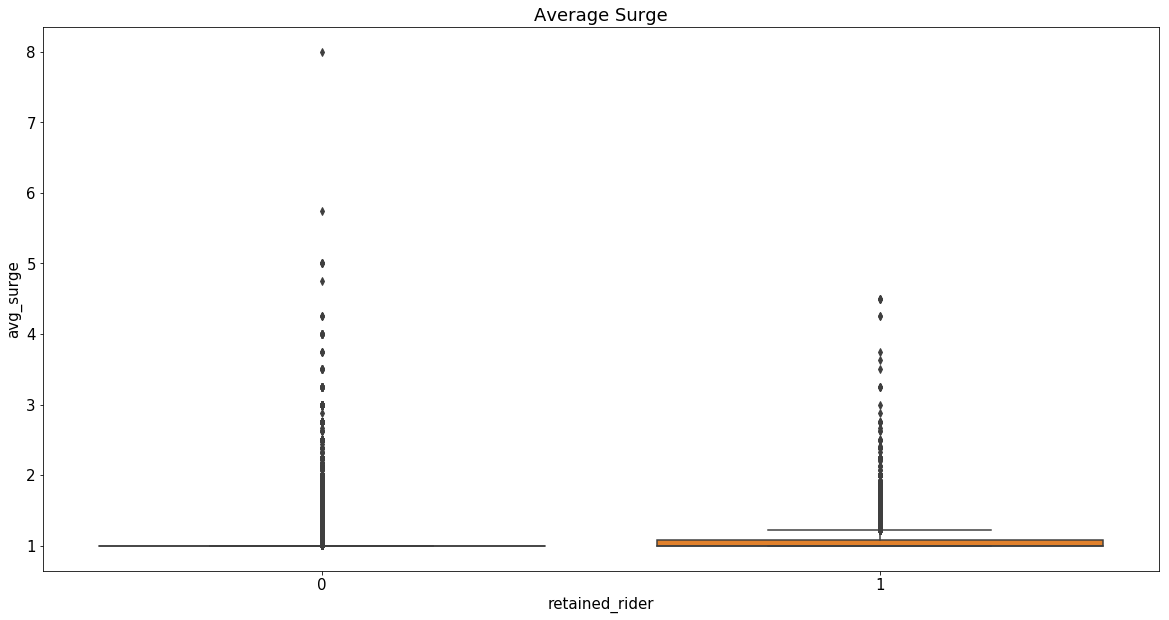

In [16]:
sns.boxplot(x = 'retained_rider', y ='avg_surge', data=rider_data)
plt.title('Average Surge')
plt.show()

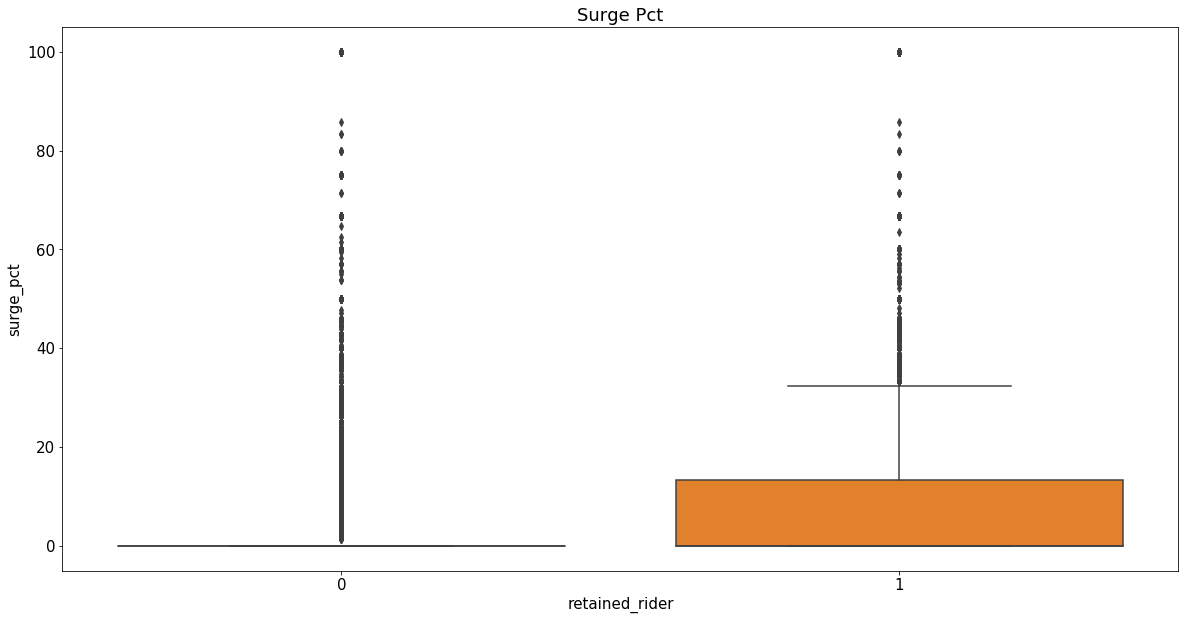

In [17]:
sns.boxplot(x = 'retained_rider', y ='surge_pct', data=rider_data)
plt.title('Surge Pct')
plt.show()

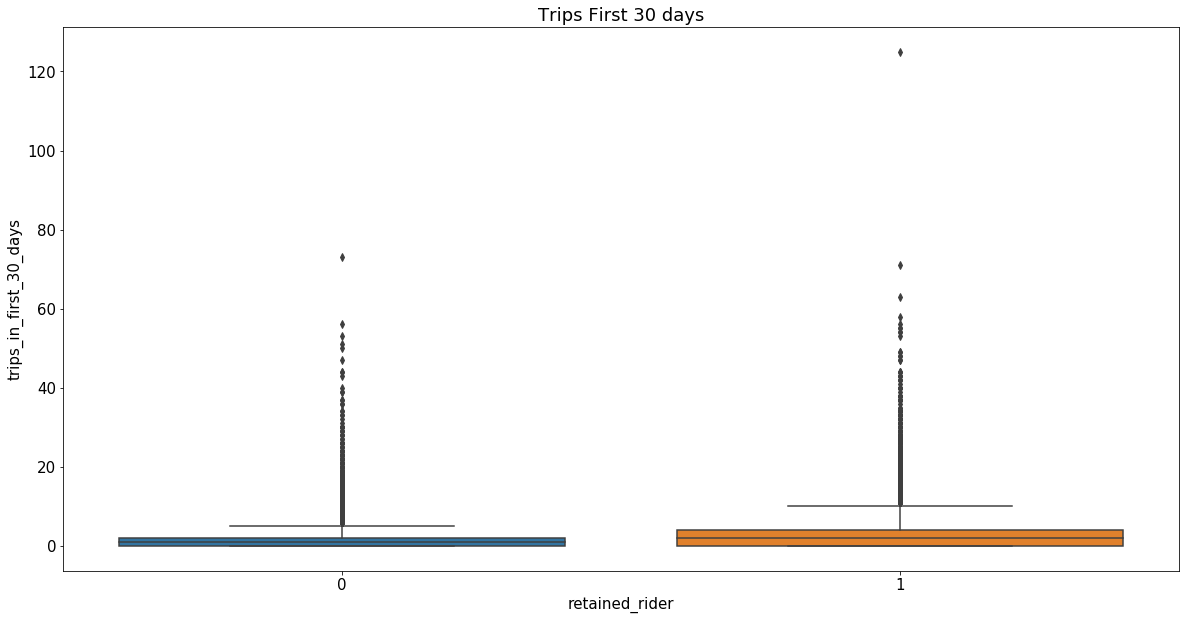

In [18]:
sns.boxplot(x = 'retained_rider', y ='trips_in_first_30_days', data=rider_data)
plt.title('Trips First 30 days')
plt.show()

In [19]:
# split into two groups: retained and not retained

retained_riders = rider_data[rider_data['retained_rider'] == 1]
non_retained_riders = rider_data[rider_data['retained_rider'] == 0]

Text(0.5,1,'Distribution of Rides First 30 Days')

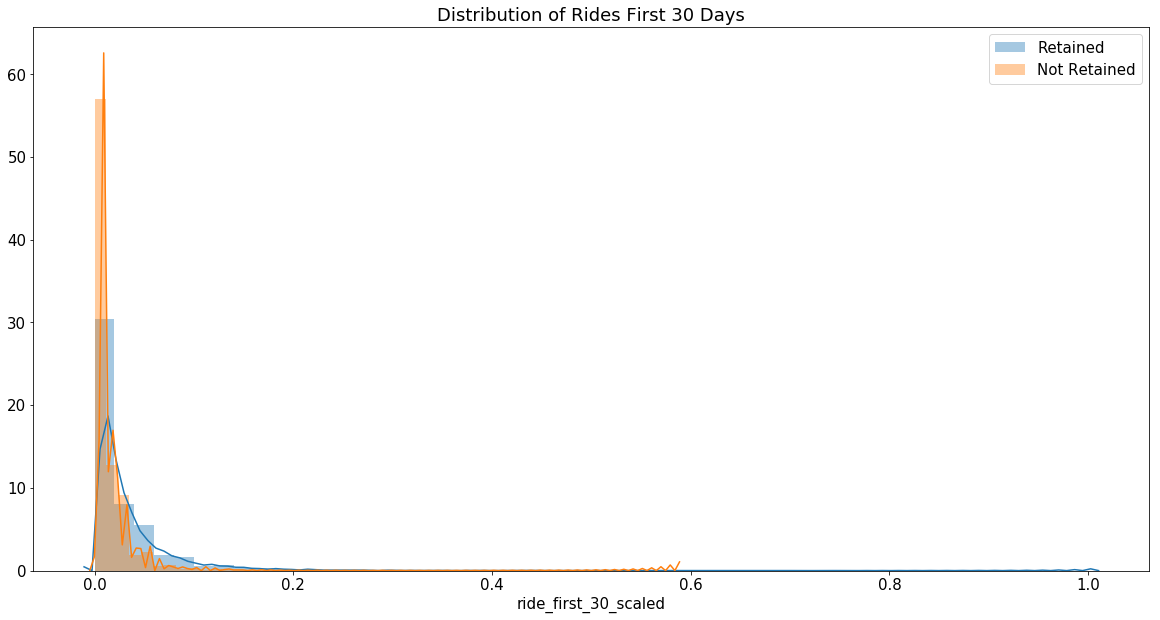

In [20]:
sns.distplot(retained_riders['ride_first_30_scaled'], norm_hist=True, label='Retained')

sns.distplot(non_retained_riders['ride_first_30_scaled'], norm_hist=True, label = 'Not Retained')

plt.legend()

plt.title('Distribution of Rides First 30 Days')

Text(0.5,1,'Distribution of Rides First 30 Days')

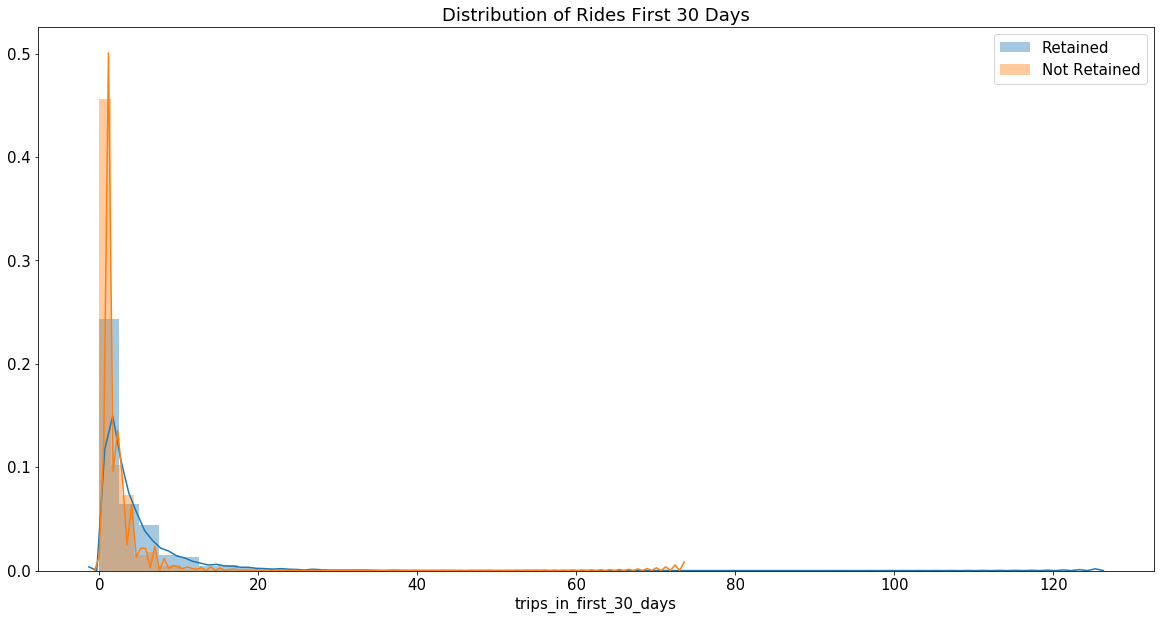

In [21]:
sns.distplot(retained_riders['trips_in_first_30_days'], norm_hist=True, label='Retained')

sns.distplot(non_retained_riders['trips_in_first_30_days'], norm_hist=True, label = 'Not Retained')

plt.legend()

plt.title('Distribution of Rides First 30 Days')

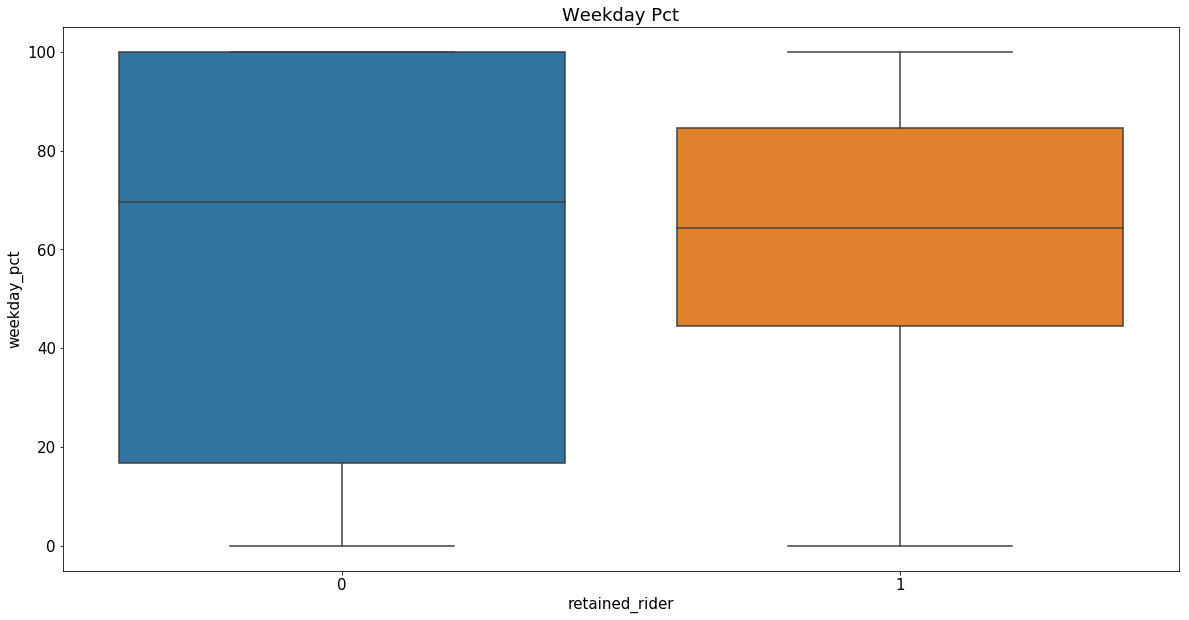

In [22]:
sns.boxplot(x = 'retained_rider', y ='weekday_pct', data=rider_data)
plt.title('Weekday Pct')
plt.show()

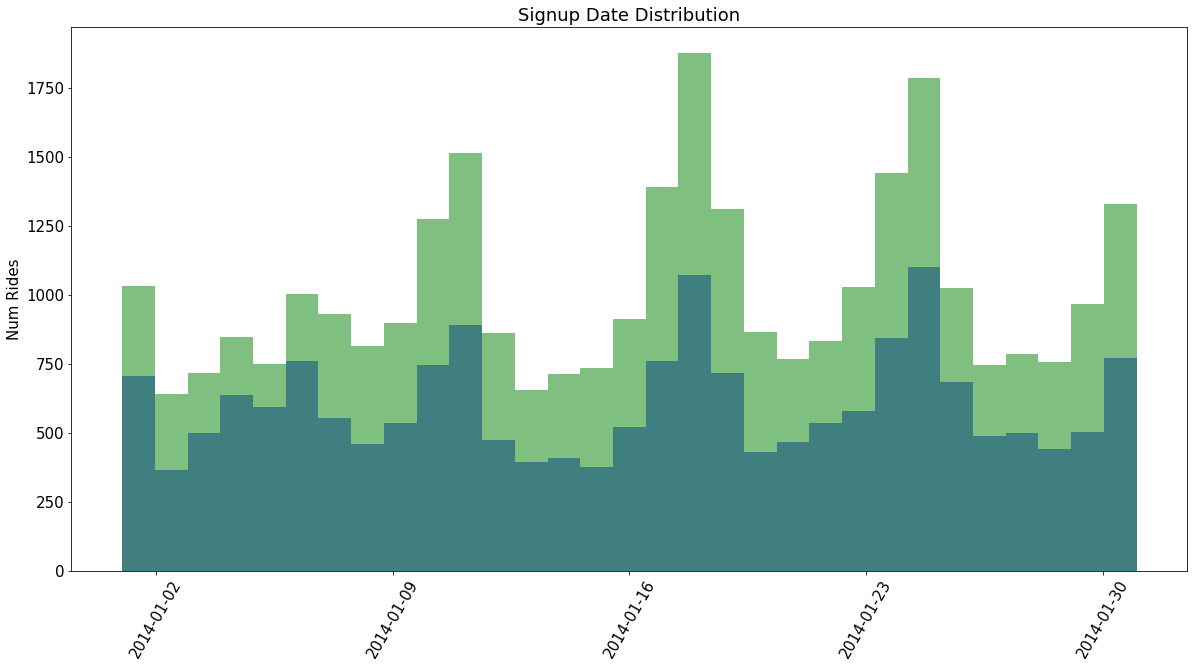

In [23]:
# visualize each day of signups (all took place first month)
plt.hist(retained_riders['signup_date'], bins=31, alpha=0.5, color='b')
plt.hist(non_retained_riders['signup_date'], bins=31, alpha=0.5, color='g')
plt.ylabel('Num Rides')
plt.xticks(rotation=60)
plt.title('Signup Date Distribution')

plt.show()

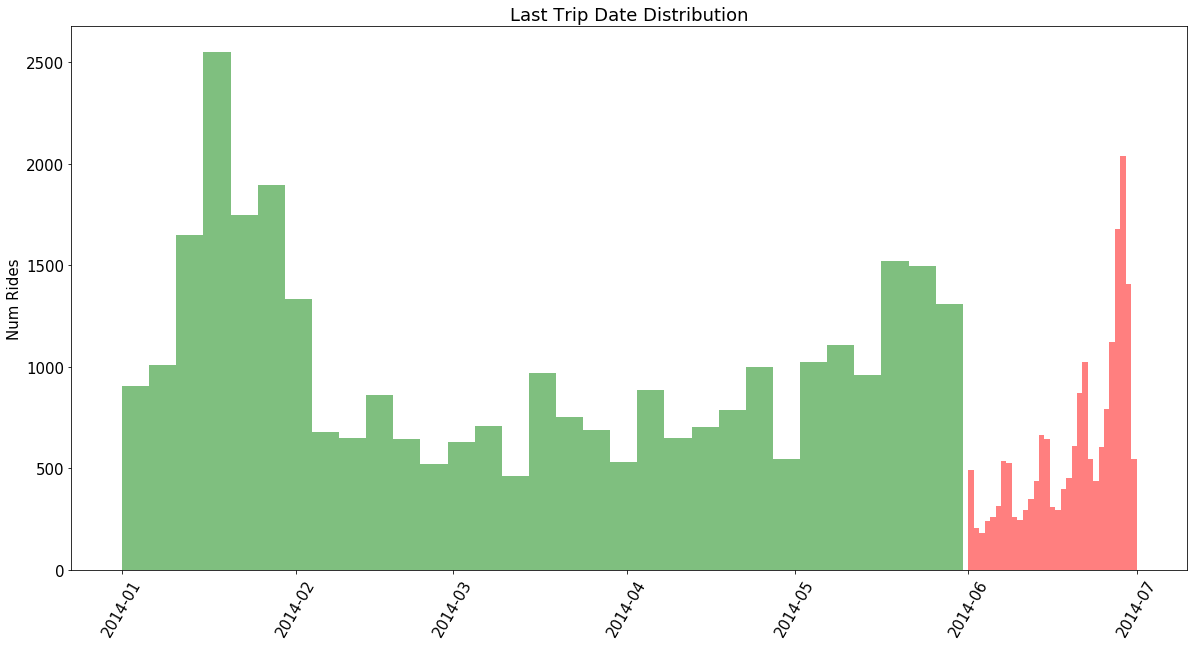

In [24]:
# visualize each day of signups (all took place first month)
plt.hist(retained_riders['last_trip_date'], bins=31, alpha=0.5, color='r')
plt.hist(non_retained_riders['last_trip_date'], bins=31, alpha=0.5, color='g')
plt.ylabel('Num Rides')
plt.xticks(rotation=60)
plt.title('Last Trip Date Distribution')

plt.show()

retained hue - date - trips line graph

**Exploratory Analysis - CATEGORICAL FEATURES**

In [53]:
retained_total = len(rider_data[rider_data['retained_rider']==1])

print('The number of retained users is',retained_total,'of',len(rider_data), 'total.')

print('Retained riders are: ', round(retained_total/len(rider_data)*100),'%.')

The number of retained users is 18804 of 50000 total.
Retained riders are:  38 %.


In [26]:
black_retained_total = rider_data[(rider_data['retained_rider'] == 1) & (rider_data['ultimate_black_user'] ==1 )]

print('The fraction of users who are black users and retained is: ',
      round(len(black_retained_total)/len(rider_data)*100),'%.')

The fraction of users who are black users and retained is:  19 %.


Text(0.5,1,'Users City by Retention Status')

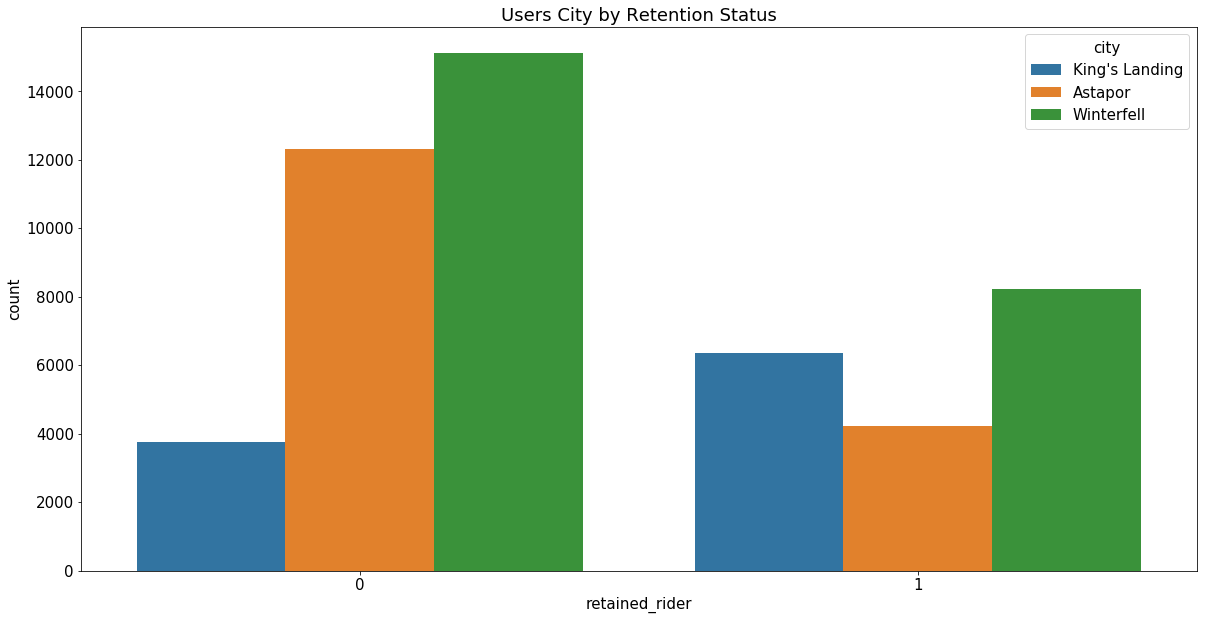

In [27]:
#Plot User City

sns.countplot(x="retained_rider", hue="city", data=rider_data)
plt.title('Users City by Retention Status')

Text(0.5,1,'Users Phone by Retention Status')

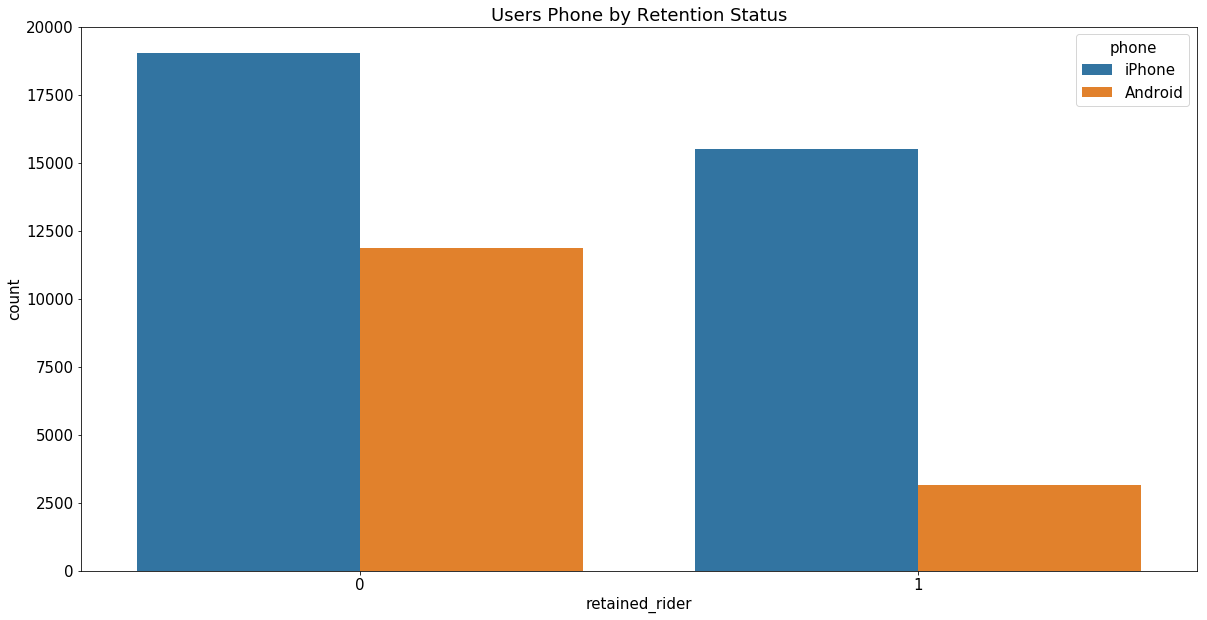

In [28]:
#Plot Phone

sns.countplot(x="retained_rider", hue="phone", data=rider_data)
plt.title('Users Phone by Retention Status')

Text(0.5,1,'Black Users by Retention Status')

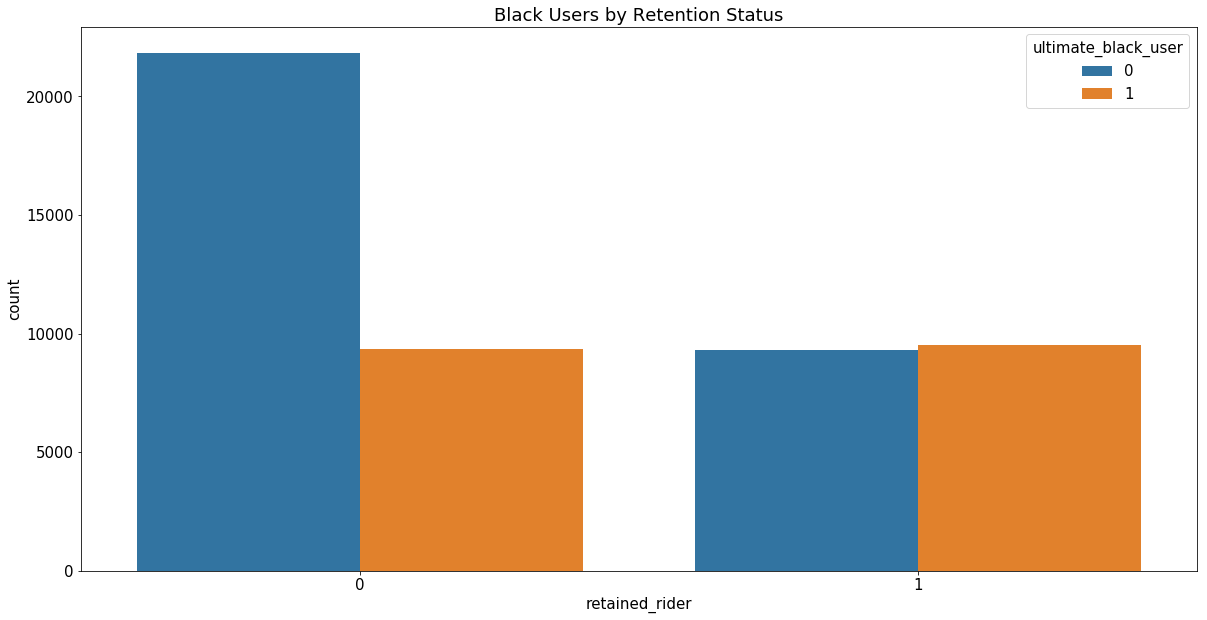

In [29]:
#Plot Phone

sns.countplot(x="retained_rider", hue="ultimate_black_user", data=rider_data)
plt.title('Black Users by Retention Status')

**Exploratory Analysis - Correlations**

Text(0.5,1,'Heat Map of Correlations')

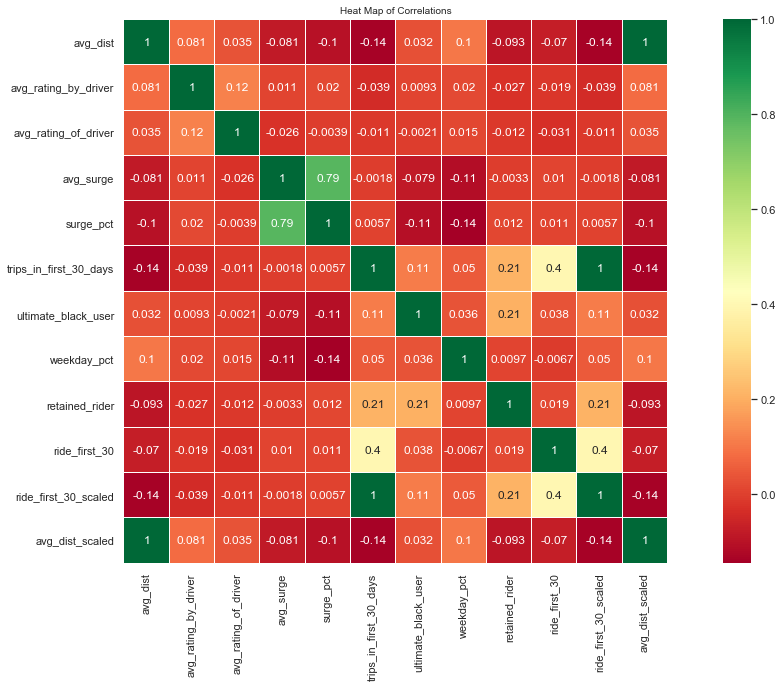

In [30]:
# Make a heatmap of correlations

# Calculate correlations

corr = rider_data.corr()

sns.set(font_scale=1)

sns.heatmap(corr, square=True, linewidths=.05, annot=True, cmap='RdYlGn')

plt.title('Heat Map of Correlations', fontsize = 10)

> ###  3.2 One Hot Encode Categorical Features

In [31]:
cat_cols = ['city','phone','ultimate_black_user','ride_first_30']

onehot_rider_data = pd.get_dummies(data = rider_data, dummy_na = False, columns = cat_cols)

> ###  3.3 Create train (85%), test (5%) and validation (10% splits) | Input Missing Values in X

In [32]:
cols = ['signup_date', 'trips_in_first_30_days', 'retained_rider', 'last_trip_date', 'avg_dist']

x = onehot_rider_data.drop(cols, axis = 1) #drop non-numeric values and y  

#Fill NA values with median rating.

imp = SimpleImputer(strategy='median')

x2 = imp.fit_transform(x)

In [33]:
#Define Y

y = onehot_rider_data['retained_rider'].values

In [34]:
# Split the data into a training and test set.
xtrain, xtest, ytrain, ytest = train_test_split(x2, y, 
                                                test_size = .15,
                                                train_size = .85, 
                                                random_state=42)

In [35]:
# Split the test set into a validation and test set.
xvalid, xtest, yvalid, ytest = train_test_split(xtest, ytest, 
                                                test_size = .33,
                                                train_size = .67 , 
                                                random_state=42)

> ###  3.4 Logistic Regression

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.74      0.86      0.79      1554
           1       0.67      0.49      0.56       921

   micro avg       0.72      0.72      0.72      2475
   macro avg       0.70      0.67      0.68      2475
weighted avg       0.71      0.72      0.71      2475

Trained Accuracy:  0.7210823529411765
Test Accuracy:  0.7191919191919192


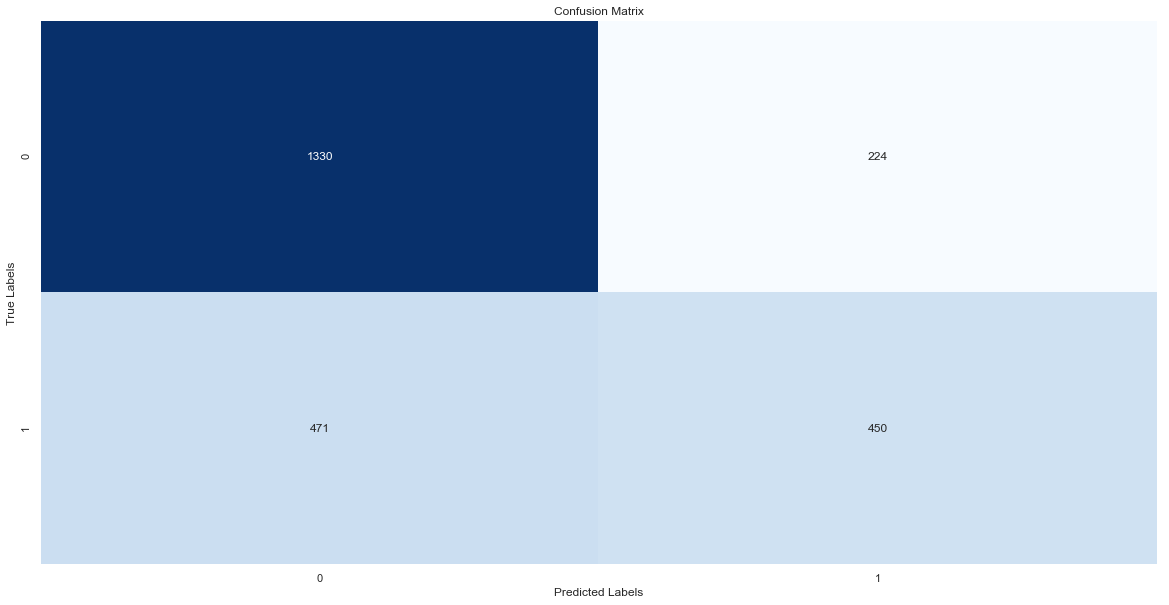

In [36]:
log_model = LogisticRegression()

# Fit the model on the trainning data.

log_model.fit(xtrain, ytrain)

#Predict using testing data
y_predict = log_model.predict(xtest)

# Confusion matrix

plt.figure()
sns.heatmap(confusion_matrix(ytest, y_predict), annot=True, cbar=False, cmap="Blues", fmt="d") 
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

# Classification Report


print('CLASSIFICATION REPORT:')
print(classification_report(ytest, y_predict))

#Accuracy Score


#Accuracy of trained model
print("Trained Accuracy: ", log_model.score(xtrain, ytrain))

#Accuracy of predictions
print("Test Accuracy: ",accuracy_score(ytest, y_predict))

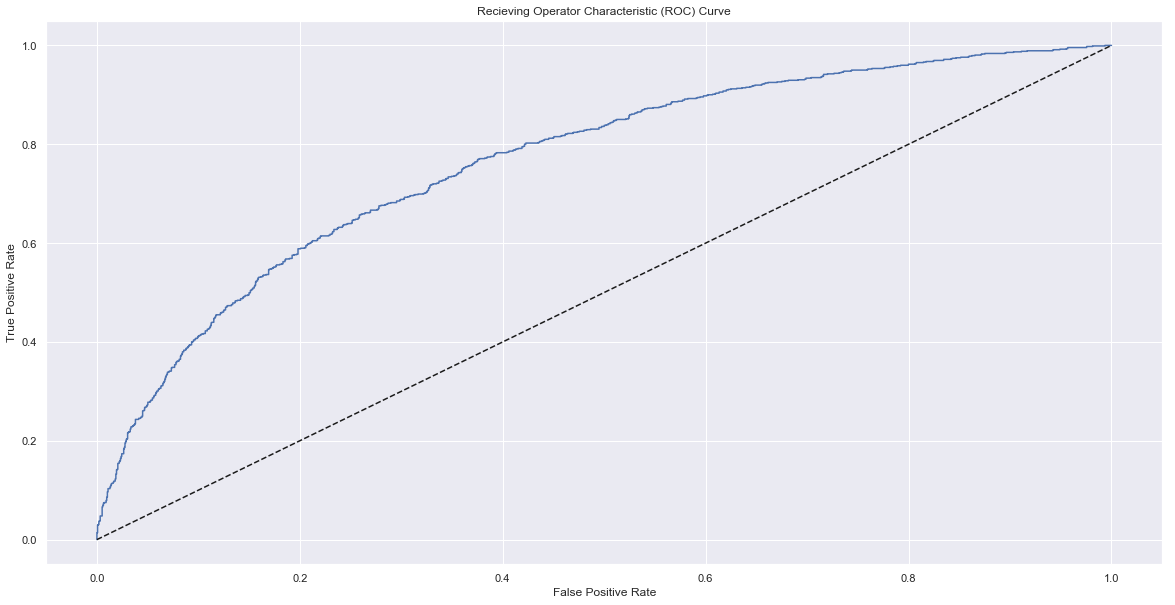

The AUC is:  0.76546218158596


In [37]:
Y_pred_prob = log_model.predict_proba(xtest)[:,1] #picing up class 1 probabilites, which we are interested in predicting

# print(Y_pred_prob)

false_positive, true_positive, thresholds = roc_curve(ytest, Y_pred_prob)

plt.plot(false_positive, true_positive) # False postive rate (x) vs. True positive rate (y)
plt.plot([0,1], [0,1], 'k--') # plotting guessing line (50% probability)
plt.title("Recieving Operator Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#finding Area Under ROC Curve
print("The AUC is: ", roc_auc_score(ytest, Y_pred_prob))

*Grid Search CV*

In [38]:
#Set parameters to search over

params = {"C": [0.0001, 0.001, 0.1, 1, 10, 100], 
          "penalty": ['l1','l2']}

#Create GridSearch object witk five fold cross validation

models = GridSearchCV(log_model, param_grid=params, cv=5, scoring="accuracy")

models.fit(xvalid, yvalid)

models.best_params_, models.best_score_

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

({'C': 100, 'penalty': 'l1'}, 0.7136318407960199)

*Final Model*

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.74      0.86      0.80      1554
           1       0.68      0.49      0.57       921

   micro avg       0.72      0.72      0.72      2475
   macro avg       0.71      0.68      0.68      2475
weighted avg       0.72      0.72      0.71      2475

Trained Accuracy:  0.7232
Test Accuracy:  0.7248484848484849


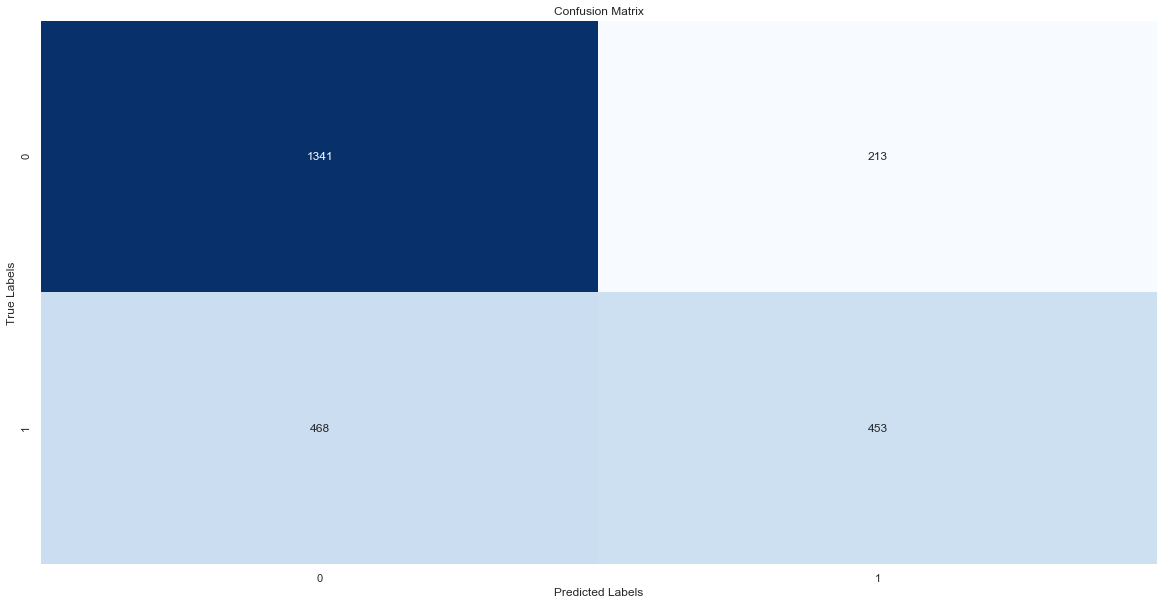

In [39]:
log_model_final = LogisticRegression(penalty='l1', C=100)

# Fit the model on the trainning data.

log_model_final.fit(xtrain, ytrain)

#Predict using testing data
y_predict = log_model_final.predict(xtest)

# Confusion matrix

plt.figure()
sns.heatmap(confusion_matrix(ytest, y_predict), annot=True, cbar=False, cmap="Blues", fmt="d") 
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

# Classification Report


print('CLASSIFICATION REPORT:')
print(classification_report(ytest, y_predict))

#Accuracy Score


#Accuracy of trained model
print("Trained Accuracy: ", log_model_final.score(xtrain, ytrain))

#Accuracy of predictions
print("Test Accuracy: ",accuracy_score(ytest, y_predict))

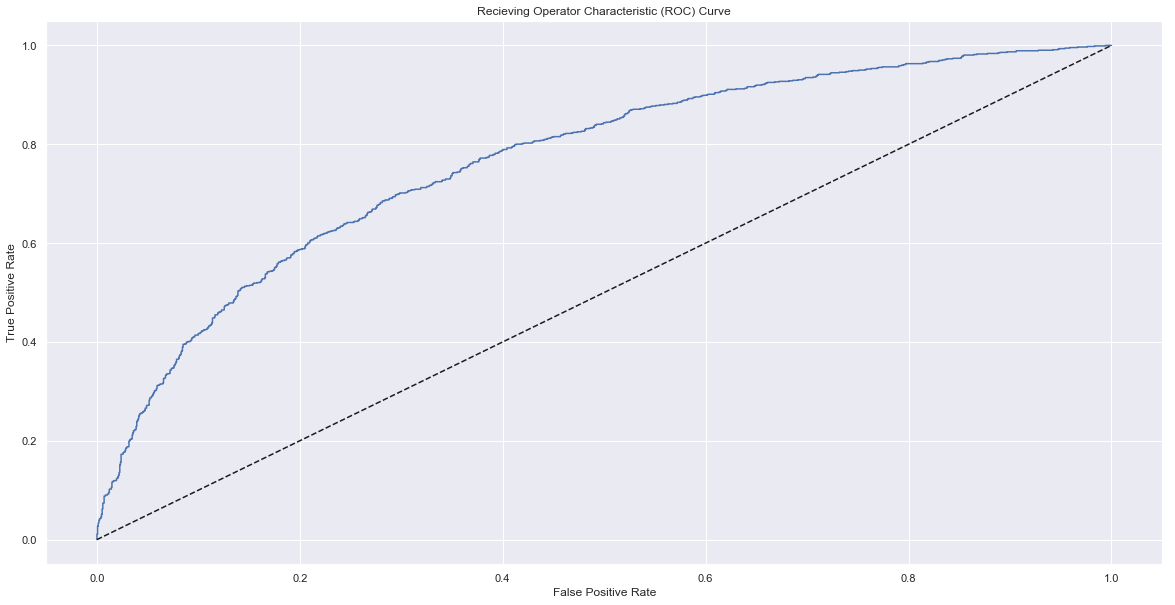

The AUC is:  0.7673074423888755


In [40]:
Y_pred_prob = log_model_final.predict_proba(xtest)[:,1] #picing up class 1 probabilites, which we are interested in predicting

# print(Y_pred_prob)

false_positive, true_positive, thresholds = roc_curve(ytest, Y_pred_prob)

plt.plot(false_positive, true_positive) # False postive rate (x) vs. True positive rate (y)
plt.plot([0,1], [0,1], 'k--') # plotting guessing line (50% probability)
plt.title("Recieving Operator Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#finding Area Under ROC Curve
print("The AUC is: ", roc_auc_score(ytest, Y_pred_prob))

*Final Model CV*

In [41]:
cvscores = cross_val_score(log_model_final, xvalid, yvalid, cv=5, scoring='accuracy')

print('Average: ',np.average(cvscores), '(+/-)', np.std(cvscores))

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Average:  0.7136345042468426 (+/-) 0.011076351075500224


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


> ###  3.5 Random Forest Classifier

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1554
           1       0.63      0.61      0.62       921

   micro avg       0.72      0.72      0.72      2475
   macro avg       0.70      0.70      0.70      2475
weighted avg       0.72      0.72      0.72      2475

Trained Accuracy:  0.9614588235294118
Test Accuracy:  0.7236363636363636
CPU times: user 431 ms, sys: 18.2 ms, total: 449 ms
Wall time: 318 ms


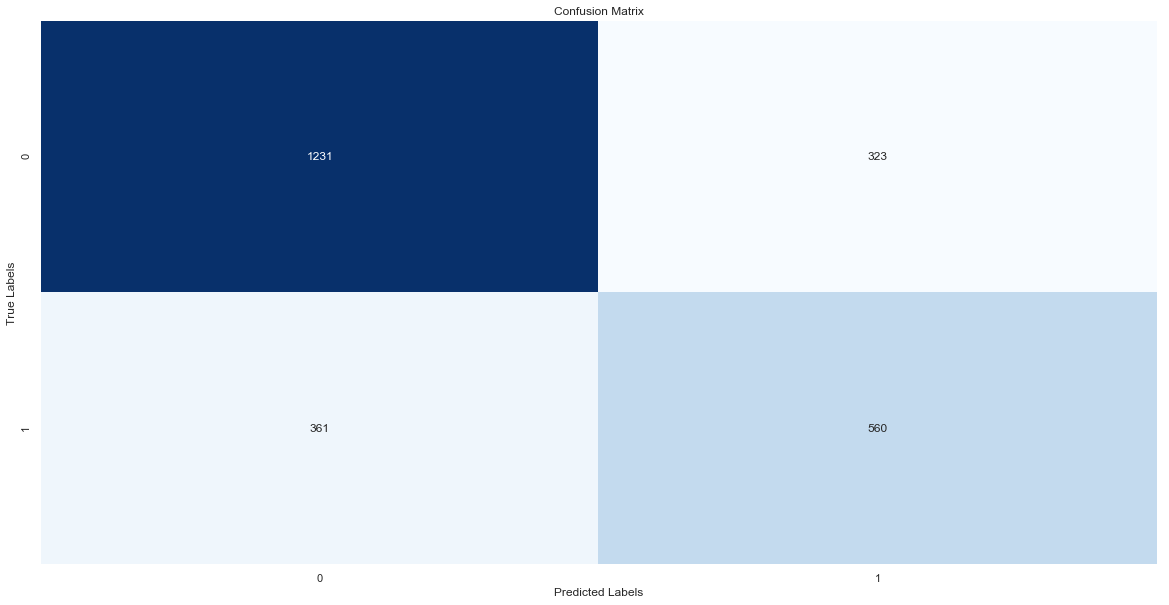

In [42]:
%%time

random_forest_model = RandomForestClassifier(n_estimators = 5, max_features = 'auto',
                                             criterion ='gini', random_state = 42)

# Fit the model on the trainning data.

random_forest_model.fit(xtrain, ytrain)

#Predict using testing data
y_predict = random_forest_model.predict(xtest)

# Confusion matrix

plt.figure()
sns.heatmap(confusion_matrix(ytest, y_predict), annot=True, cbar=False, cmap="Blues", fmt="d") 
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

# Classification Report


print('CLASSIFICATION REPORT:')
print(classification_report(ytest, y_predict))

#Accuracy Score


#Accuracy of trained model
print("Trained Accuracy: ", random_forest_model.score(xtrain, ytrain))

#Accuracy of predictions
print("Test Accuracy: ",accuracy_score(ytest, y_predict))

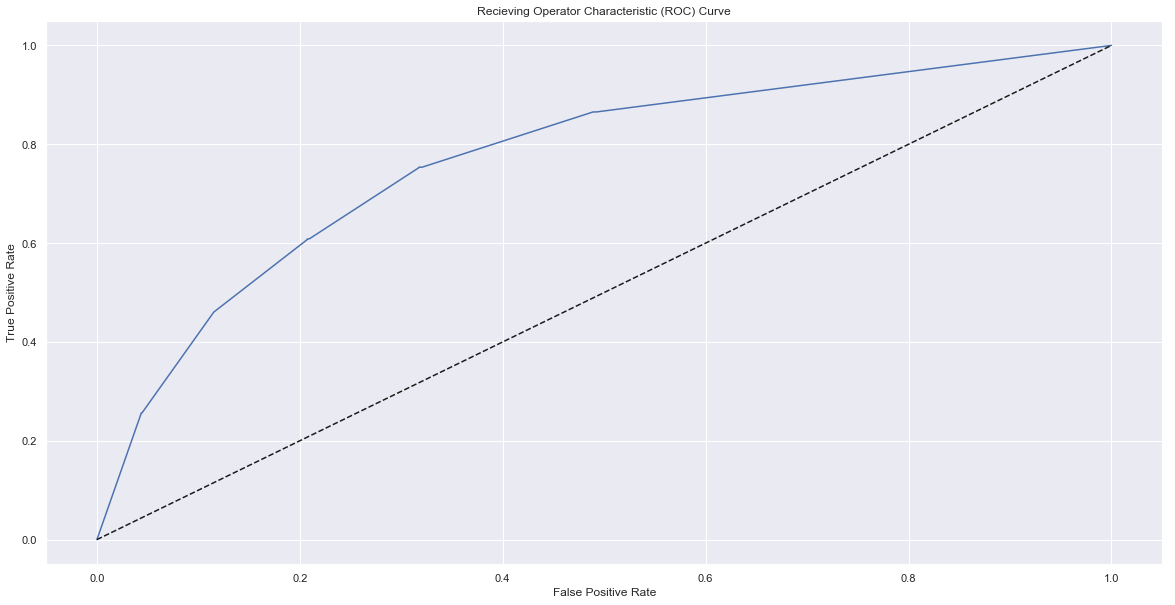

The AUC is:  0.7701899200270536


In [43]:
Y_pred_prob = random_forest_model.predict_proba(xtest)[:,1] #picing up class 1 probabilites, which we are interested in predicting

# print(Y_pred_prob)

false_positive, true_positive, thresholds = roc_curve(ytest, Y_pred_prob)

plt.plot(false_positive, true_positive) # False postive rate (x) vs. True positive rate (y)
plt.plot([0,1], [0,1], 'k--') # plotting guessing line (50% probability)
plt.title("Recieving Operator Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#finding Area Under ROC Curve
print("The AUC is: ", roc_auc_score(ytest, Y_pred_prob))

*Grid Search CV*

In [44]:
#Set parameters to search over

params = {"n_estimators": np.arange(2,44,4), 
          "max_features": ['auto','sqrt','log2',0.25,0.5,0.75,1],
          "criterion":['gini', 'entropy']}

#Create GridSearch object witk five fold cross validation

models = GridSearchCV(random_forest_model, param_grid=params, cv=5, scoring="accuracy")

models.fit(xvalid, yvalid)

models.best_params_, models.best_score_

({'criterion': 'gini', 'max_features': 0.75, 'n_estimators': 34},
 0.7540298507462686)

*Final Model*

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1554
           1       0.67      0.64      0.65       921

   micro avg       0.75      0.75      0.75      2475
   macro avg       0.73      0.73      0.73      2475
weighted avg       0.75      0.75      0.75      2475

Trained Accuracy:  0.9951294117647059
Test Accuracy:  0.7490909090909091
CPU times: user 4.73 s, sys: 68.6 ms, total: 4.8 s
Wall time: 4.83 s


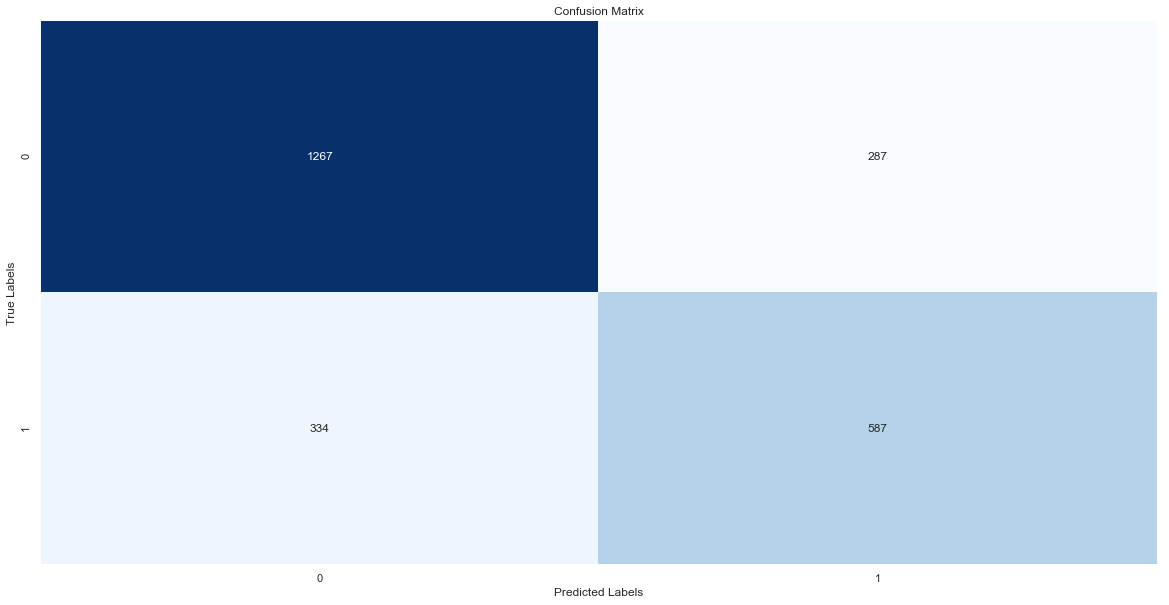

In [45]:
%%time

random_forest_model_final = RandomForestClassifier(n_estimators = 42, max_features = 0.75,
                                             criterion ='entropy', random_state = 42)

# Fit the model on the trainning data.

random_forest_model_final.fit(xtrain, ytrain)

#Predict using testing data
y_predict = random_forest_model_final.predict(xtest)

# Confusion matrix

plt.figure()
sns.heatmap(confusion_matrix(ytest, y_predict), annot=True, cbar=False, cmap="Blues", fmt="d") 
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

# Classification Report


print('CLASSIFICATION REPORT:')
print(classification_report(ytest, y_predict))

#Accuracy Score


#Accuracy of trained model
print("Trained Accuracy: ", random_forest_model_final.score(xtrain, ytrain))

#Accuracy of predictions
print("Test Accuracy: ",accuracy_score(ytest, y_predict))

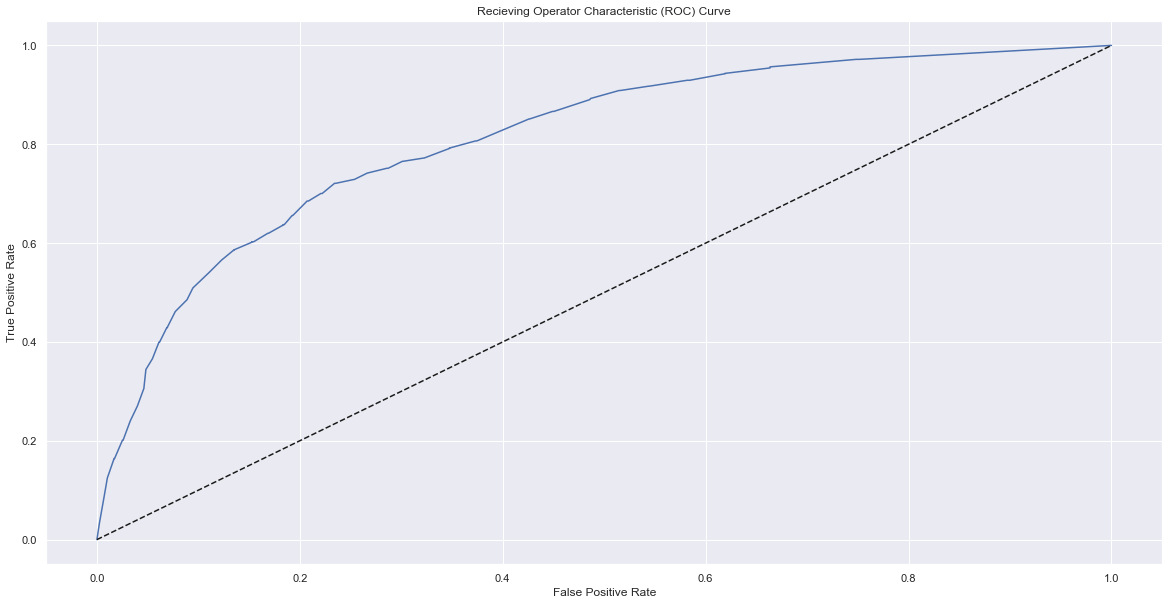

The AUC is:  0.8118717833701548


In [46]:
Y_pred_prob = random_forest_model_final.predict_proba(xtest)[:,1] #picing up class 1 probabilites, which we are interested in predicting

# print(Y_pred_prob)

false_positive, true_positive, thresholds = roc_curve(ytest, Y_pred_prob)

plt.plot(false_positive, true_positive) # False postive rate (x) vs. True positive rate (y)
plt.plot([0,1], [0,1], 'k--') # plotting guessing line (50% probability)
plt.title("Recieving Operator Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#finding Area Under ROC Curve
print("The AUC is: ", roc_auc_score(ytest, Y_pred_prob))

*Final Model CV*

In [47]:
cvscores = cross_val_score(random_forest_model_final, xvalid, yvalid, cv=5, scoring='accuracy')

print('Average: ',np.average(cvscores), '(+/-)', np.std(cvscores))

Average:  0.7510415073925834 (+/-) 0.009304479647380506


> ###  3.6 Feature Importances

*Logistic Regression*

In [48]:
#Calculate Relative Feature Importances

feature_importance = abs(log_model_final.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

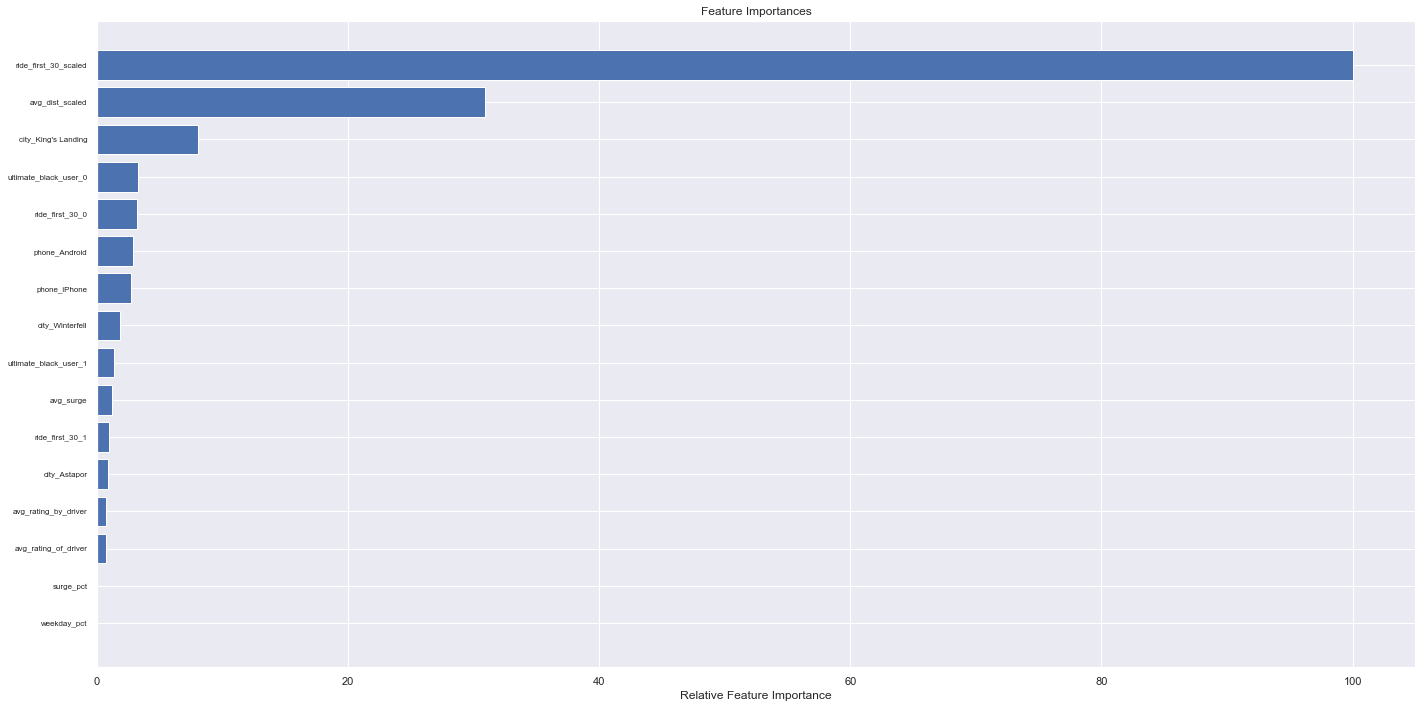

In [49]:
#Plot Relative Feature Importances

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(x.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')
featax.set_title('Feature Importances')

plt.tight_layout()   
plt.show()

*Random Forests*

In [50]:
feature_importances = pd.DataFrame(random_forest_model_final.feature_importances_,
                                   index = x.columns, 
                                   columns=['importance']).sort_values('importance', ascending=False)

feature_importances

,importance
avg_dist_scaled,0.332263
avg_rating_by_driver,0.130919
weekday_pct,0.119341
avg_rating_of_driver,0.085683
surge_pct,0.073813
ride_first_30_scaled,0.060206
city_King's Landing,0.051231
avg_surge,0.046125
phone_Android,0.020676
city_Astapor,0.013939


In [51]:
feature_importances.index

Index(['avg_dist_scaled', 'avg_rating_by_driver', 'weekday_pct',
       'avg_rating_of_driver', 'surge_pct', 'ride_first_30_scaled',
       'city_King's Landing', 'avg_surge', 'phone_Android', 'city_Astapor',
       'ultimate_black_user_0', 'ultimate_black_user_1', 'phone_iPhone',
       'city_Winterfell', 'ride_first_30_1', 'ride_first_30_0'],
      dtype='object')

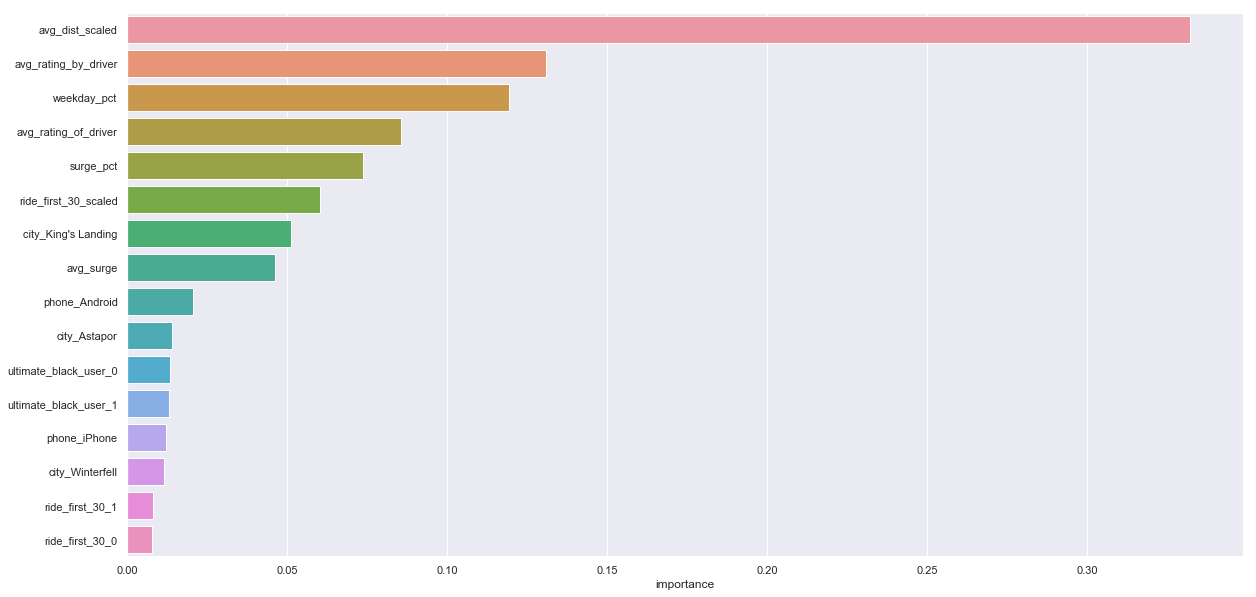

In [52]:
#Get Feature Importances

importances = (random_forest_model.feature_importances_)*100

sns.barplot(x = 'importance', y= feature_importances.index, data = feature_importances)

### Basic Stats

+ The number of retained users is 18804 of 50000 total. Which is 38% of total users in the cohort.
+ The number of black users and retained is 19%.
+ Kings Landing tends to retain more users than the other 3 cities.
+ In average, distance in miles is less for retained users. Meanwhile, average surge is larger for retained users.
+ Weekday percent average is slighly lower for retained users. The 25th and 75th percentile  of the weekday percent feature is larger for non-retained users.
+ A greater proportion of iphone users wasa retained.

### Data Wrangling 

1. Average distance and trips in the first 30 days were re-scaled. 
2. Indicator variable was created to indicate wether user took a trip in the first 30 days.
3. Dates were converted to datetime objects. 
4. Categorical variables were one-hot encoded.
5. X and Y arrays were created. I attempted to include time since last session on the x arrays, but the results were sub-optimal in the modeling phase so I did not used it.  
6. Train (85%), test (5%) and validation (10%) samples were created.

### Summary of Modeling Findings

**Modeling Goal:** The goal of the exploratory analysis and modeling efforts is to ascertain which features are most important in predicting user retention (likelyhood user will be active 6-months after signup). 

**Modeling Approach:** Two modeling approaches were used to explore the user retention question: (1) logistic regression and, (2) random forest. I attempted this models for three reasons: (1) outcome variable is binary, (2) they are highly interpretable and, (3) they are efficient (time that takes to run). Alternative modeling approaches to these two include Support Vector Machine Classifier and Gradient Booster Classifier.

**Evaluation Strategy:** Models will be evaluated using accuracy and area under the curve (AUC).

**Logistic Regresion Main Findings:**

1. Final logistic regression model accuracy is 72% for the trained data and 72% for the test data. No signs of overfitting detected. 
2. Final model AUC is 76.73%
3. Top three important features: 3. Top three important features: (1) number of trips user took in the first 30 days, (2) average distance, and (3) city = King's Landing. 

**Random Forest Main Findings:**

1. Final logistic regression model accuracy is 99.5% for the trained data and 75% for the test data. This model is overfitting (i.e. accuracy is significantly better for the training data than for the testing(unseen) data). 
2. Final model AUC is 81.18%. This is ~5% than the logistic regression model.
3. Top three important features: (1) average distance, (2) average rating by driver, and (3) weekday pct.
 

**Recomendations & Next Steps:**

1. Both models suggest that the the average distance is an important factor. Users with shorter distances are more likely to be active. As such, you may want to concentrate your marketing and retention efforts in users with shorter distances.
2. Number of trips in the first 30 days and weekday percent also were important features. The company can offer discounts in the first 30 days to encourage retention. I would also recommend to further investigate the profile of users who take trips in the first 30 days. Weekday percent maybe a an important feature becuase people are traveling for work or personal business, resulting in greater demand for the service. 
3. The Kings Landing city resulted to be an important feature as well. At this point I do not have a lot of information on this city. It could be a lot of the users are from this city, or they have shorter distances to travel, or is a denser city.  
4. During exploratory analysis I found that there were more iphone users that are active users than android. Investigate wether the user experience with the android phones. There is a large difference in rentention between iphone users and android users. However, this also can be counfounded with income or other user charactetristics. For example, are iphone users higher income in general than android users? Are there more iphones in general in this market and thus more statistically frequent?

## End of Notebook